In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orig = pd.read_csv("airway_scaledcounts.csv")
df_meta = pd.read_csv("airway_metadata.csv")

In [3]:
data = pd.concat([df_meta, df_orig.set_index("ensgene").T.reset_index()], axis = 1)

In [4]:
clean_data = pd.DataFrame()
for c in data.columns:
    if data[c].dtype == object:
        clean_data[c] = data[c]
    if data[c].dtype == float and np.sum(data[c]) > 10:
        clean_data[c] = data[c]

In [5]:
clean_data

,id,dex,celltype,geo_id,index,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,...,ENSG00000283070,ENSG00000283085,ENSG00000283086,ENSG00000283087,ENSG00000283088,ENSG00000283091,ENSG00000283094,ENSG00000283100,ENSG00000283101,ENSG00000283104
0,SRR1039508,control,N61311,GSM1275862,SRR1039508,723.0,467.0,347.0,96.0,3413.0,...,4.0,1260.0,4.0,190.0,1.0,51.0,2187.0,647.0,3.0,71.0
1,SRR1039509,treated,N61311,GSM1275863,SRR1039509,486.0,523.0,258.0,81.0,3916.0,...,0.0,774.0,5.0,182.0,13.0,42.0,1536.0,570.0,3.0,70.0
2,SRR1039512,control,N052611,GSM1275866,SRR1039512,904.0,616.0,364.0,73.0,6000.0,...,7.0,1034.0,10.0,332.0,72.0,79.0,2491.0,645.0,9.0,116.0
3,SRR1039513,treated,N052611,GSM1275867,SRR1039513,445.0,371.0,237.0,66.0,4308.0,...,6.0,437.0,1.0,187.0,13.0,34.0,1253.0,369.0,10.0,45.0
4,SRR1039516,control,N080611,GSM1275870,SRR1039516,1170.0,582.0,318.0,118.0,6424.0,...,5.0,1057.0,6.0,332.0,47.0,87.0,2316.0,688.0,4.0,95.0
5,SRR1039517,treated,N080611,GSM1275871,SRR1039517,1097.0,781.0,447.0,94.0,10723.0,...,5.0,1129.0,10.0,390.0,62.0,96.0,2026.0,670.0,13.0,83.0
6,SRR1039520,control,N061011,GSM1275874,SRR1039520,806.0,417.0,330.0,102.0,5039.0,...,1.0,1009.0,3.0,156.0,36.0,55.0,2000.0,550.0,7.0,84.0
7,SRR1039521,treated,N061011,GSM1275875,SRR1039521,604.0,509.0,324.0,74.0,7803.0,...,3.0,722.0,2.0,239.0,33.0,51.0,1529.0,572.0,7.0,79.0


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
clean_data_numeric = list(clean_data.columns[clean_data.dtypes ==  "float"])

In [9]:
pca.fit(clean_data[clean_data_numeric])

PCA(n_components=2)

In [10]:
data_pca = pca.transform(clean_data[clean_data_numeric])

In [11]:
data_pca = pd.concat([df_meta,pd.DataFrame(data_pca, columns = ["pca_1","pca_2"])],axis = 1, )

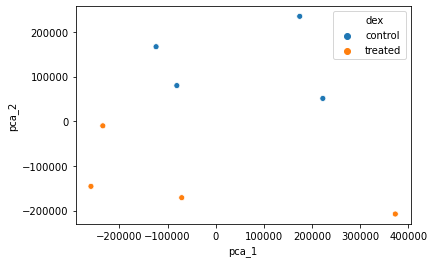

In [12]:
sns.scatterplot(data_pca["pca_1"], data_pca["pca_2"], hue=data_pca.dex);

In [13]:
index = clean_data[clean_data_numeric].T.index
index = index.set_names("symbol")

In [24]:
index

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000971', 'ENSG00000001036',
       'ENSG00000001084', 'ENSG00000001167', 'ENSG00000001460',
       'ENSG00000001461',
       ...
       'ENSG00000283070', 'ENSG00000283085', 'ENSG00000283086',
       'ENSG00000283087', 'ENSG00000283088', 'ENSG00000283091',
       'ENSG00000283094', 'ENSG00000283100', 'ENSG00000283101',
       'ENSG00000283104'],
      dtype='object', name='symbol', length=19083)

In [222]:
import mygene
mg = mygene.MyGeneInfo()
gene_dict = mg.querymany(index,scopes='ensembl.gene')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-19083...done.
Finished.
158 input query terms found no hit:
	['ENSG00000069712', 'ENSG00000116957', 'ENSG00000130201', 'ENSG00000130489', 'ENSG00000133808', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [15]:
gene_dict_bool=[True if "entrezgene" in gene_dict[i].keys() else False for i in range(len(gene_dict))]

In [16]:
gene_dict_clean = [gene_dict[i] for i in range(len(gene_dict)) if gene_dict_bool[i]]

In [159]:
entrez = [str(gene_dict_clean[i]['entrezgene']) for i in range(len(gene_dict_clean))]

In [18]:
clean_data_numeric = clean_data[clean_data_numeric].T

0    SRR1039508
1    SRR1039509
2    SRR1039512
3    SRR1039513
4    SRR1039516
5    SRR1039517
6    SRR1039520
7    SRR1039521
Name: id, dtype: object

In [216]:
clean_data_numeric_entrez = clean_data_numeric[gene_dict_bool]
clean_data_numeric_entrez.index = entrez
clean_data_numeric_entrez.columns = list(df_meta.id)
clean_data_numeric_entrez.index.set_names("entrezid",inplace=True)

clean_data_numeric_entrez.to_csv("airway_clean2.csv",index=False)
pd.DataFrame(clean_data_numeric_entrez.index).to_csv("id.csv")

In [190]:
clean_data_numeric_entrez

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
entrezid,,,,,,,,
7105,723,486,904,445,1170,1097,806,604
8813,467,523,616,371,582,781,417,509
57147,347,258,364,237,318,447,330,324
55732,96,81,73,66,118,94,102,74
3075,3413,3916,6000,4308,6424,10723,5039,7803
...,...,...,...,...,...,...,...,...
3399,65,64,56,23,81,95,39,65
25998,543,431,790,393,657,830,574,558
7162,1260,774,1034,437,1057,1129,1009,722


In [28]:
import rpy2

print(rpy2.__version__)

from rpy2.robjects.packages import importr

base = importr('base')

utils = importr('utils')

import rpy2.robjects.packages as rpackages

utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('ggplot2', 'hexbin','BiocManager','read_csv')

from rpy2.robjects.vectors import StrVector

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]

if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

2.9.4


In [29]:
from rpy2 import robjects

In [30]:
robjects.r('''
        # create a function `f`
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        # call the function `f` with argument value 3
        f(3)
        ''')

18.849556


In [31]:
r_f = robjects.r['f']
print(r_f)

r_f(4)[0] + 5

function(r, verbose=FALSE) {

            if (verbose) {

                cat("I am calling f().

")

            }

            2 * pi * r

        }



30.132741228718345

In [32]:
def install_custom(custom, manager):
        names_to_install = [x for x in custom if not rpackages.isinstalled(x)]

        if len(names_to_install) > 0:
            if not manager:
                biocinstaller = importr("BiocInstaller")
                biocinstaller.biocLite(robjects.vectors.StrVector(custom),suppressUpdates=True)
            else:
                biocinstaller = importr("BiocManager")
                for c in custom:
                    if '=' in c:
                        pkg,version= tuple(c.split('='))
                        biocinstaller.install(pkg,ask=False,version=version)
                    else:
                        biocinstaller.install(c,ask=False) 

In [33]:
install_custom(["edgeR","GO.db","org.Hs.eg.db"],True)

In [34]:
edger = importr("edgeR")

In [35]:
df_orig.rename(columns={'ensgene':'symbol'}, inplace=True)

In [36]:
from rpy2.robjects.vectors import FactorVector

In [37]:
group = FactorVector(["1","2","1","2","1","2","1","2"])

In [158]:
robjects.r('''reads2 <- read.delim("airway_scaledcounts_R.csv",sep = ",", row.names="symbol")''')

SRR1039508,SRR1039509,SRR1039512,...,SRR1039517,SRR1039520,SRR1039521
723,486,904,...,"1,097",806,604
0,0,0,...,0,0,0
467,523,616,...,781,417,509
347,258,364,...,447,330,324
...,...,...,...,...,...,...
0,0,0,...,0,0,0
0,0,0,...,0,0,0
1,2,1,...,1,2,0
0,0,0,...,0,0,0


In [302]:
reads = robjects.r('''reads <- read.delim("airway_clean2.csv",sep = ",", colClasses="numeric", row.names="entrezid")''')

RRuntimeError: Error in data[[rowvar]] : 
  attempt to select less than one element in get1index


In [211]:
robjects.r['reads']

entrezid,SRR1039508,SRR1039509,...,SRR1039517,SRR1039520,SRR1039521
7105.000000,723.000000,486.000000,...,1097.000000,806.000000,604.000000
8813.000000,467.000000,523.000000,...,781.000000,417.000000,509.000000
57147.000000,347.000000,258.000000,...,447.000000,330.000000,324.000000
55732.000000,96.000000,81.000000,...,94.000000,102.000000,74.000000
...,...,...,...,...,...,...
25998.000000,543.000000,431.000000,...,830.000000,574.000000,558.000000
7162.000000,1260.000000,774.000000,...,1129.000000,1009.000000,722.000000
22933.000000,647.000000,570.000000,...,670.000000,550.000000,572.000000
54938.000000,71.000000,70.000000,...,83.000000,84.000000,79.000000


In [115]:
clean_data_numeric_entrez

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
,,,,,,,,
7105,723.0,486.0,904.0,445.0,1170.0,1097.0,806.0,604.0
8813,467.0,523.0,616.0,371.0,582.0,781.0,417.0,509.0
57147,347.0,258.0,364.0,237.0,318.0,447.0,330.0,324.0
55732,96.0,81.0,73.0,66.0,118.0,94.0,102.0,74.0
3075,3413.0,3916.0,6000.0,4308.0,6424.0,10723.0,5039.0,7803.0
...,...,...,...,...,...,...,...,...
3399,65.0,64.0,56.0,23.0,81.0,95.0,39.0,65.0
25998,543.0,431.0,790.0,393.0,657.0,830.0,574.0,558.0
7162,1260.0,774.0,1034.0,437.0,1057.0,1129.0,1009.0,722.0


In [40]:
dgelist= edger.DGEList(counts=reads, group = group)

In [41]:
keep = edger.filterByExpr(dgelist)

In [42]:
edger.calcNormFactors(dgelist)

R object with classes: ('DGEList',) mapped to:
<ListVector - Python:0x0000022A13DB7748 / R:0x0000022A3A46C258>
[Matrix, DataFrame]
  counts: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x0000022A13E2A988 / R:0x0000022A3BADAFB8>
[     723,        0,      467,      347, ...,        0,        0,        0,        0]
R object with classes: ('DGEList',) mapped to:
<ListVector - Python:0x0000022A13DB7748 / R:0x0000022A3A46C258>
[Matrix, DataFrame]

In [244]:
robjects.r('''
x <- read.delim("airway_scaledcounts_R.csv",sep = ",",row.names="symbol")
group <- factor(c(1,2,1,2,1,2,1,2))
y <- DGEList(counts=x,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
''');

In [245]:
robjects.r('''
fit <- glmQLFit(y,design)
qlf <- glmQLFTest(fit,coef=2)
top <- topTags(qlf)
gene_names <- row.names(top)
gene_names_all <- row.names(qlf)
''');

In [248]:
from rpy2.robjects import pandas2ri
import mygene

top = robjects.r['top']
top_df = pd.DataFrame(pandas2ri.ri2py_vector(top[0]))

g_names = robjects.r['gene_names']
g_names = list(g_names)

mg = mygene.MyGeneInfo()
gene_dict = mg.querymany(g_names,scopes='ensembl.gene')
trans_g_names = [gene_dict[i]["symbol"] for i in range(len(g_names))]
top_df.index = trans_g_names

top_df

querying 1-10...done.
Finished.


,logFC,logCPM,F,PValue,FDR
PER1,2.864503,5.079485,311.015454,4.185936e-08,0.000352
SPARCL1,4.366974,5.440028,302.732544,4.693055e-08,0.000352
ARHGEF2,-1.035587,6.694059,248.691728,1.076859e-07,0.000352
MAOA,3.341153,6.759023,235.915685,1.344471e-07,0.000352
PHC2,1.439419,7.058140,234.724780,1.373386e-07,0.000352
DUSP1,2.964412,7.287927,213.816591,2.031771e-07,0.000352
KCTD12,-2.489460,6.931440,213.157922,2.058212e-07,0.000352
DNM1,-1.850263,5.492352,205.215346,2.412973e-07,0.000352
SMIM3,1.278675,5.674972,197.252430,2.847255e-07,0.000352
STOM,1.426753,9.259155,196.909215,2.868050e-07,0.000352


In [297]:
robjects.r('''
x <- read.delim("airway_clean2.csv",sep = ",")
id <- read.delim("id.csv",sep = ",")
group <- factor(c(1,2,1,2,1,2,1,2))
y <- DGEList(counts=x,group=group, gene=id)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
ida <- id[keep,]
idv <- ida[2]
idc <- as.vector(idv)
idd <- as.character(idc)
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
''');

In [276]:
robjects.r('''
fit <- glmQLFit(y,design)
qlf <- glmQLFTest(fit,coef=2)
top <- topTags(qlf)
gene_names <- row.names(top)
gene_names_all <- row.names(qlf)
''');

In [299]:

robjects.r('''
qlf <- glmQLFTest(fit, coef=2)
go <- goana(qlf, species="Hs", geneid = idc)
topgo <- topGO(go, sort="up")
keg <- kegga(qlf, species="Hs", geneid = ida[2])
topkegg <- topKEGG(keg, sort="up")
''')

RRuntimeError: Error in goana.DGELRT(qlf, species = "Hs", geneid = idc) : 
  Column c(7105, 8813, 57147, 55732, 3075, 2519, 2729, 4800, 90529, 57185, 81887, 22875, 6405, 54467, 1595, 889, 5893, 572, 51056, 4267, 23072, 8379, 3927, 29916, 55365, 4074, 90293, 56603, 3382, 79007, 57679, 843, 8837, 7035, 55471, 10181, 9108, 6542, 381, 23098, 26073, 23129, 204, 2288, 23028, 10180, 84254, 5965, 55610, 126393, 115703, 4706, 5166, 51364, 340273, 10165, 7982, 996, 3052, 1856, 5976, 8935, 292, 55013, 5439, 56919, 221981, 3980, 79657, 6296, 81691, 57019, 56928, 80256, 51226, 5577, 10943, 1387, 
9256, 6936, 84058, 54677, 5244, 55904, 57414, 25998, 7748, 23077, 26224, 5164, 3675, 7543, 3920, 51573, 55049, 9244, 114881, 26022, 9020, 54972, 163, 10127, 6376, 64847, 8913, 51330, 5898, 55971, 80853, 2115, 55750, 221, 57157, 9855, 79017, 10926, 6915, 3475, 1352, 9569, 54623, 27072, 9912, 60528, 85477, 414, 8228, 79602, 51265, 57787, 115098, 5048, 9703, 8522, 79090, 54879, 5080, 113000, 64285, 55692, 9254, 115939, 9091, 57585, 7005, 55735, 2328, 29116, 27035, 5689, 6853


In [298]:
robjects.r["idc"]

entrezid
"7,105"
"8,813"
"57,147"
"55,732"
...
"25,998"
"7,162"
"22,933"
"54,938"


In [239]:
idx = robjects.r['idd']

In [273]:
df_meta

,id,dex,celltype,geo_id
0,SRR1039508,control,N61311,GSM1275862
1,SRR1039509,treated,N61311,GSM1275863
2,SRR1039512,control,N052611,GSM1275866
3,SRR1039513,treated,N052611,GSM1275867
4,SRR1039516,control,N080611,GSM1275870
5,SRR1039517,treated,N080611,GSM1275871
6,SRR1039520,control,N061011,GSM1275874
7,SRR1039521,treated,N061011,GSM1275875
